# Theory 3 - Phase Kickback



In [ ]:
# ALWAYS RUN THIS CELL AFTER YOU LOAD (OR RELOAD) THE NOTEBOOK

# Generic cell for correct operation of QCO materials in Google Colab (jcperez@disca.upv.es):
!pip -qqq install qiskit[visualization]
import qiskit
%matplotlib inline
qiskit.__version__

# Not always necessary (jcperez@disca.upv.es):
!pip -qqq install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

# To fix a bug/version incompatibility in that file (jcperez@disca.upv.es):
!sed -ie 's/denominator >/denominator() >/g' /usr/local/lib/python3.8/dist-packages/qiskit/visualization/array.py

# To set graphical circuit drawing by default in qiskit (jcperez@disca.upv.es):
!mkdir ${HOME}/.qiskit 2>/dev/null
!printf "[default]\ncircuit_drawer = mpl\n" > ${HOME}/.qiskit/settings.conf

## Contents

1. [Exploring the CNOT-Gate](#exploring-cnot)
2. [Phase Kickback](#kickback)     
    2.1 [Explaining the CNOT Circuit Identity](#explaining-identity)     
    2.2 [Kickback with the T-gate](#kickback-t-gate)    

## 1. Exploring the CNOT-Gate <a id="exploring-cnot"></a>

In the previous section, we saw some very basic results with the CNOT gate. Here we will explore some more interesting results. 

We saw that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

But what happens if we put the second qubit in superposition? 

In [ ]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

In the circuit above, we have the CNOT acting on the state:

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Since the CNOT swaps the amplitudes of $|01\rangle$ and $|11\rangle$, we see no change:

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

Let’s put the target qubit in the state $|-\rangle$, so it has a negative phase:

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

This creates the state:

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

<font color='brown' size=+0>
EXERCISE: Develop this result from the sate vectors of $|{-}\rangle$$ and $$|{+}\rangle$

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

If the CNOT acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11\rangle$, resulting in the state:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}
$$


This is interesting, because it affects the state of the _control_ qubit while leaving the state of the _target_ qubit unchanged. 


In [ ]:
qc.cx(0,1)
display(qc.draw())

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector(qc)
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

If you remember the H-gate transforms $|{+}\rangle \rightarrow |0\rangle$ and $|{-}\rangle \rightarrow |1\rangle$, we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction: 

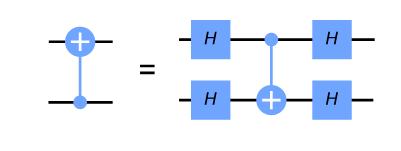

We can verify this using Qiskit's Aer simulator:

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

In [ ]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

This identity is an example of _phase kickback.

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table